In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
import html

, parse_dates='timestamp')
df_eval = pd.read_csv("./evaluation.csv")
df_trainvaltest.values[np.argmax(df_trainvaltest['title'].isna()),:]
df_trainvaltest['title'].dropna(inplace=True)
df_trainvaltest.values[np.argmax(df_trainvaltest['article'].isna()),:]
df_trainvaltest['article'].fillna('',inplace=True)


df_trainvaltest['title'] = df_trainvaltest['title'].str.casefold().str.strip()
df_trainvaltest['article'] =df_trainvaltest['article'].str.lower().str.strip()
df_trainvaltest['source'] =df_trainvaltest['source'].str.casefold().str.strip()

df_trainvaltest.drop_duplicates(subset = 'article', inplace=True)

df_trainvaltest.loc[df_trainvaltest['article'].str.startswith("read full"),'article'] = ' '

df_trainvaltest['text'] = 2 * df_trainvaltest['title'] + ' ' + df_trainvaltest['article']
mask = df_trainvaltest['label'] == 5

df_trainvaltest['text'] = html.unescape(df_trainvaltest['text'])
X_trainvalvaltest = df_trainvaltest[['text', 'source', 'page_rank']]

X_trainvalvaltest.loc[mask,'text'] = 2 * df_trainvaltest.loc[mask, 'title']  + 3*df_trainvaltest.loc[mask,'article'] 

y_trainvaltest = df_trainvaltest['label']


X_trainval, X_test, y_trainval, y_test = train_test_split(
  X_trainvalvaltest,
  y_trainvaltest,
  test_size= .2,
  random_state=42,
  stratify=y_trainvaltest
)



NameError: name 'df_trainvaltest' is not defined

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
import html

df_trainvaltest = pd.read_csv("./development.csv")
df_eval = pd.read_csv("./evaluation.csv")
df_trainvaltest.values[np.argmax(df_trainvaltest['title'].isna()),:]
df_trainvaltest['title'].dropna(inplace=True)
df_trainvaltest.values[np.argmax(df_trainvaltest['article'].isna()),:]
df_trainvaltest['article'].fillna('',inplace=True)


df_trainvaltest['title'] = df_trainvaltest['title'].str.casefold().str.strip()
df_trainvaltest['article'] =df_trainvaltest['article'].str.lower().str.strip()
df_trainvaltest['source'] =df_trainvaltest['source'].str.casefold().str.strip()

df_trainvaltest.drop_duplicates(subset = 'article', inplace=True)

df_trainvaltest.loc[df_trainvaltest['article'].str.startswith("read full"),'article'] = ' '

df_trainvaltest['text'] = 2 * df_trainvaltest['title'] + ' ' + df_trainvaltest['article']
mask = df_trainvaltest['label'] == 5

df_trainvaltest['text'] = html.unescape(df_trainvaltest['text'])
X_trainvalvaltest = df_trainvaltest[['text', 'source', 'page_rank']]

X_trainvalvaltest.loc[mask,'text'] = 6 * df_trainvaltest.loc[mask, 'title']  + 3*df_trainvaltest.loc[mask,'article'] 

y_trainvaltest = df_trainvaltest['label']


X_trainval, X_test, y_trainval, y_test = train_test_split(
  X_trainvalvaltest,
  y_trainvaltest,
  test_size= .2,
  random_state=42,
  stratify=y_trainvaltest
)

from sklearn.svm import LinearSVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MaxAbsScaler


preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', TfidfVectorizer(stop_words='english'), 'text'),
        ('source', OneHotEncoder(handle_unknown='ignore'), ['source']),
        #('hour', OneHotEncoder(handle_unknown='ignore'), ['time_slot']),
        ('page_rank', OneHotEncoder(handle_unknown='ignore'), ['page_rank'])
    ]
)
pipe = Pipeline([
  ('preprocessor', preprocessor),
   ('clf', LinearSVC(max_iter=3000, dual=False))
   ])

param_grid = {
    'preprocessor__tfidf__max_features': [15000, 20000, 30000], 
    'preprocessor__tfidf__ngram_range': [ (1,1), (1, 3)],
    'preprocessor__tfidf__binary': [True, False],
    'preprocessor__tfidf__sublinear_tf': [True, False],
    'preprocessor__tfidf__min_df': [1, 2, 5, 10],
    'preprocessor__tfidf__max_df': [.5, .7, .9],
    'clf__C': np.logspace(-1,2,6), # C basso aiuta contro l'overfitting
    'clf__class_weight': ['balanced'],
    #'clf__solver': ['liblinear', 'lbfgs'],
    'clf__penalty': [ 'l1','l2']
}

grid_search = RandomizedSearchCV(
  pipe,
  param_grid,
  n_iter=15,
  cv=3,
  n_jobs=5,
  verbose=3, 
  scoring='f1_macro',
  error_score='raise')
grid_search.fit(X_trainval, y_trainval)

print(grid_search.best_score_, grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

print(classification_report(best_model.predict(X_test), y_test))


/tmp/ipykernel_64648/3745146737.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_trainvaltest['article'].fillna('',inplace=True)


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV 2/3] END clf__C=6.30957344480193, clf__class_weight=balanced, clf__penalty=l2, preprocessor__tfidf__binary=False, preprocessor__tfidf__max_df=0.9, preprocessor__tfidf__max_features=15000, preprocessor__tfidf__min_df=10, preprocessor__tfidf__ngram_range=(1, 1), preprocessor__tfidf__sublinear_tf=False;, score=0.638 total time=  23.5s
[CV 1/3] END clf__C=6.30957344480193, clf__class_weight=balanced, clf__penalty=l2, preprocessor__tfidf__binary=False, preprocessor__tfidf__max_df=0.9, preprocessor__tfidf__max_features=15000, preprocessor__tfidf__min_df=10, preprocessor__tfidf__ngram_range=(1, 1), preprocessor__tfidf__sublinear_tf=False;, score=0.633 total time=  26.9s
[CV 3/3] END clf__C=6.30957344480193, clf__class_weight=balanced, clf__penalty=l2, preprocessor__tfidf__binary=False, preprocessor__tfidf__max_df=0.9, preprocessor__tfidf__max_features=15000, preprocessor__tfidf__min_df=10, preprocessor__tfidf__ngram_range=(1, 1)

/usr/lib/python3/dist-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END clf__C=25.118864315095795, clf__class_weight=balanced, clf__penalty=l1, preprocessor__tfidf__binary=False, preprocessor__tfidf__max_df=0.9, preprocessor__tfidf__max_features=15000, preprocessor__tfidf__min_df=1, preprocessor__tfidf__ngram_range=(1, 3), preprocessor__tfidf__sublinear_tf=False;, score=0.616 total time= 3.7min
[CV 2/3] END clf__C=25.118864315095795, clf__class_weight=balanced, clf__penalty=l1, preprocessor__tfidf__binary=False, preprocessor__tfidf__max_df=0.9, preprocessor__tfidf__max_features=15000, preprocessor__tfidf__min_df=1, preprocessor__tfidf__ngram_range=(1, 3), preprocessor__tfidf__sublinear_tf=False;, score=0.623 total time= 3.6min
[CV 1/3] END clf__C=25.118864315095795, clf__class_weight=balanced, clf__penalty=l2, preprocessor__tfidf__binary=False, preprocessor__tfidf__max_df=0.5, preprocessor__tfidf__max_features=20000, preprocessor__tfidf__min_df=5, preprocessor__tfidf__ngram_range=(1, 1), preprocessor__tfidf__sublinear_tf=False;, score=0.616 to

/usr/lib/python3/dist-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END clf__C=25.118864315095795, clf__class_weight=balanced, clf__penalty=l1, preprocessor__tfidf__binary=False, preprocessor__tfidf__max_df=0.9, preprocessor__tfidf__max_features=15000, preprocessor__tfidf__min_df=1, preprocessor__tfidf__ngram_range=(1, 3), preprocessor__tfidf__sublinear_tf=False;, score=0.621 total time= 4.2min
[CV 2/3] END clf__C=25.118864315095795, clf__class_weight=balanced, clf__penalty=l2, preprocessor__tfidf__binary=False, preprocessor__tfidf__max_df=0.5, preprocessor__tfidf__max_features=20000, preprocessor__tfidf__min_df=5, preprocessor__tfidf__ngram_range=(1, 1), preprocessor__tfidf__sublinear_tf=False;, score=0.619 total time=  41.1s
[CV 1/3] END clf__C=0.3981071705534972, clf__class_weight=balanced, clf__penalty=l2, preprocessor__tfidf__binary=True, preprocessor__tfidf__max_df=0.9, preprocessor__tfidf__max_features=15000, preprocessor__tfidf__min_df=1, preprocessor__tfidf__ngram_range=(1, 1), preprocessor__tfidf__sublinear_tf=False;, score=0.686 tot

/usr/lib/python3/dist-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END clf__C=6.30957344480193, clf__class_weight=balanced, clf__penalty=l1, preprocessor__tfidf__binary=True, preprocessor__tfidf__max_df=0.5, preprocessor__tfidf__max_features=30000, preprocessor__tfidf__min_df=5, preprocessor__tfidf__ngram_range=(1, 1), preprocessor__tfidf__sublinear_tf=True;, score=0.624 total time= 3.4min
[CV 1/3] END clf__C=6.30957344480193, clf__class_weight=balanced, clf__penalty=l2, preprocessor__tfidf__binary=False, preprocessor__tfidf__max_df=0.9, preprocessor__tfidf__max_features=30000, preprocessor__tfidf__min_df=2, preprocessor__tfidf__ngram_range=(1, 3), preprocessor__tfidf__sublinear_tf=True;, score=0.663 total time=  45.7s
[CV 2/3] END clf__C=6.30957344480193, clf__class_weight=balanced, clf__penalty=l2, preprocessor__tfidf__binary=False, preprocessor__tfidf__max_df=0.9, preprocessor__tfidf__max_features=30000, preprocessor__tfidf__min_df=2, preprocessor__tfidf__ngram_range=(1, 3), preprocessor__tfidf__sublinear_tf=True;, score=0.668 total time= 

/usr/lib/python3/dist-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END clf__C=6.30957344480193, clf__class_weight=balanced, clf__penalty=l1, preprocessor__tfidf__binary=True, preprocessor__tfidf__max_df=0.5, preprocessor__tfidf__max_features=30000, preprocessor__tfidf__min_df=5, preprocessor__tfidf__ngram_range=(1, 1), preprocessor__tfidf__sublinear_tf=True;, score=0.627 total time= 3.6min
[CV 3/3] END clf__C=6.30957344480193, clf__class_weight=balanced, clf__penalty=l2, preprocessor__tfidf__binary=False, preprocessor__tfidf__max_df=0.9, preprocessor__tfidf__max_features=30000, preprocessor__tfidf__min_df=2, preprocessor__tfidf__ngram_range=(1, 3), preprocessor__tfidf__sublinear_tf=True;, score=0.664 total time=  47.3s


/usr/lib/python3/dist-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END clf__C=6.30957344480193, clf__class_weight=balanced, clf__penalty=l1, preprocessor__tfidf__binary=True, preprocessor__tfidf__max_df=0.5, preprocessor__tfidf__max_features=30000, preprocessor__tfidf__min_df=5, preprocessor__tfidf__ngram_range=(1, 1), preprocessor__tfidf__sublinear_tf=True;, score=0.624 total time= 3.6min
[CV 1/3] END clf__C=25.118864315095795, clf__class_weight=balanced, clf__penalty=l2, preprocessor__tfidf__binary=False, preprocessor__tfidf__max_df=0.7, preprocessor__tfidf__max_features=15000, preprocessor__tfidf__min_df=5, preprocessor__tfidf__ngram_range=(1, 3), preprocessor__tfidf__sublinear_tf=False;, score=0.626 total time=  51.3s
[CV 2/3] END clf__C=25.118864315095795, clf__class_weight=balanced, clf__penalty=l2, preprocessor__tfidf__binary=False, preprocessor__tfidf__max_df=0.7, preprocessor__tfidf__max_features=15000, preprocessor__tfidf__min_df=5, preprocessor__tfidf__ngram_range=(1, 3), preprocessor__tfidf__sublinear_tf=False;, score=0.630 total 

/usr/lib/python3/dist-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END clf__C=25.118864315095795, clf__class_weight=balanced, clf__penalty=l1, preprocessor__tfidf__binary=True, preprocessor__tfidf__max_df=0.5, preprocessor__tfidf__max_features=30000, preprocessor__tfidf__min_df=10, preprocessor__tfidf__ngram_range=(1, 3), preprocessor__tfidf__sublinear_tf=False;, score=0.622 total time= 3.3min


/usr/lib/python3/dist-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END clf__C=25.118864315095795, clf__class_weight=balanced, clf__penalty=l1, preprocessor__tfidf__binary=True, preprocessor__tfidf__max_df=0.5, preprocessor__tfidf__max_features=30000, preprocessor__tfidf__min_df=10, preprocessor__tfidf__ngram_range=(1, 3), preprocessor__tfidf__sublinear_tf=False;, score=0.623 total time= 3.4min


/usr/lib/python3/dist-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END clf__C=25.118864315095795, clf__class_weight=balanced, clf__penalty=l1, preprocessor__tfidf__binary=True, preprocessor__tfidf__max_df=0.5, preprocessor__tfidf__max_features=30000, preprocessor__tfidf__min_df=10, preprocessor__tfidf__ngram_range=(1, 3), preprocessor__tfidf__sublinear_tf=False;, score=0.624 total time= 3.3min
0.6880802469221052 {'preprocessor__tfidf__sublinear_tf': False, 'preprocessor__tfidf__ngram_range': (1, 1), 'preprocessor__tfidf__min_df': 1, 'preprocessor__tfidf__max_features': 15000, 'preprocessor__tfidf__max_df': 0.9, 'preprocessor__tfidf__binary': True, 'clf__penalty': 'l2', 'clf__class_weight': 'balanced', 'clf__C': np.float64(0.3981071705534972)}
0.6971261433997974
[[3352  170   82  210   74  539  117]
 [  96 1488  112   53   21   68   43]
 [  84  145 1762   67   15   42   39]
 [ 224  109  109  987  147  244   49]
 [  20    9    5   51 1555   41    4]
 [ 549  121   64  227  125  991   89]
 [  39   26   10   21    5   35  442]]
              preci

## Preprocessing

We see the presence of a na in both title and article. if they are from the same id we can remove the all row altogether, otherwise it may still contain valuable information and we only replace the missing column with an empty string

no title but not article either, i can drop it

no article but still a title, i can use it

Drop duplicates, casefold, strip spaces, links and other crap

In [ ]:
from wordcloud import WordCloud
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
import html

df_trainvaltest = pd.read_csv("./development.csv")
df_eval = pd.read_csv("./evaluation.csv")
df_trainvaltest.values[np.argmax(df_trainvaltest['title'].isna()),:]
df_trainvaltest['title'].dropna(inplace=True)
df_trainvaltest.values[np.argmax(df_trainvaltest['article'].isna()),:]
df_trainvaltest['article'].fillna('',inplace=True)


df_trainvaltest['title'] = df_trainvaltest['title'].str.casefold().str.strip()
df_trainvaltest['article'] =df_trainvaltest['article'].str.lower().str.strip()
df_trainvaltest['source'] =df_trainvaltest['source'].str.casefold().str.strip()

df_trainvaltest.drop_duplicates(subset = 'article', inplace=True)

df_trainvaltest.loc[df_trainvaltest['article'].str.startswith("read full"),'article'] = ' '

#df_trainvaltest.loc([df_trainvaltest['label'] == 5,])
str = ''
for _,row in df_trainvaltest.iterrows():
  if row['label'] == 5:
      str = str + row['article']


/tmp/ipykernel_9452/3953758626.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_trainvaltest['article'].fillna('',inplace=True)


(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

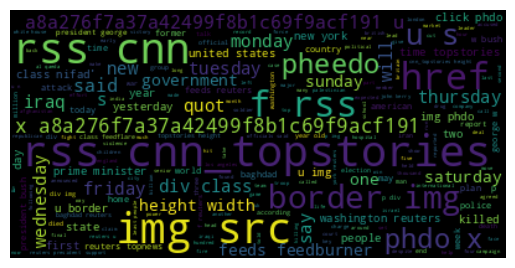

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

it is necessary to stratify over y since classes are not evenly distributed

<BarContainer object of 7 artists>

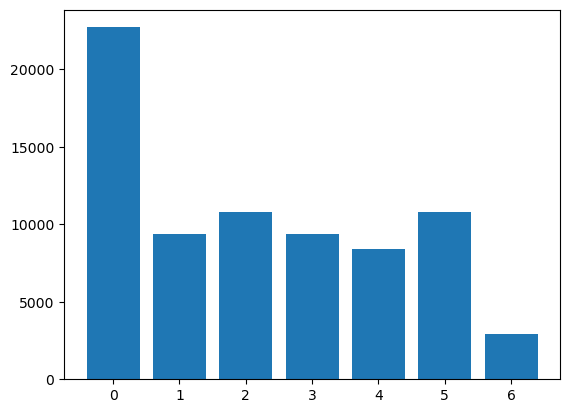

In [ ]:
from collections import Counter

plt.bar(Counter(y_trainvaltest).keys(),Counter(y_trainvaltest).values())

In [ ]:
'''
3981a767685a14497b876a659d34f60f08feaff2bc9addc69818a1ceb27a04ac
'''

'\n3981a767685a14497b876a659d34f60f08feaff2bc9addc69818a1ceb27a04ac\n'

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import html
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

import random

SEED = 888
np.random.seed(SEED)
random.seed(SEED)


def clean_data(df):
  df = df.fillna('')
  for col in ['article', 'title', 'source']:
    df[col] = df[col].str.casefold().str.strip()
  df.loc[df['article'].str.startswith('read full'), 'article'] = ''
  df['text'] = 2 * df['title'] + ' ' + df['article']
  df = html.escape(df)
  y = pd.Series()
  if 'label' in df.columns:
    mask = df['label'] == 5
    df.loc[mask, 'text'] = 6 * df['title'] + 3 * df['article']
    df.drop_duplicates(subset = 'article', inplace=True)

    y = df['label']
  X = df[['text', 'source', 'page_rank']]
  return X, y

def load_data(train_path, test_path):
  df_train_val = pd.read_csv(train_path)
  df_eval = pd.read_csv(test_path)
  return df_train_val, df_eval



def get_pipeline(model_params = None):
  if model_params is None:
    model_params = {}

  custom_stops = [
    'topstories', 'topnews', 'reuters', 'com', 'time', 'friday', 
    'washington', 'said', 'tuesday', 'george', 'bush','url', 'http'
    ]
  # Uniscile alle stopwords standard
  from sklearn.feature_extraction import text
  all_stops = text.ENGLISH_STOP_WORDS.union(custom_stops)

  from sklearn.preprocessing import StandardScaler
  preprocessor = ColumnTransformer(
    [('tfidf',TfidfVectorizer(stop_words=custom_stops), 'text'),
     ('source', OneHotEncoder(handle_unknown = 'ignore'), ['source']),
    ('page_rank', StandardScaler(), ['page_rank'])
  ])
  




  pipeline = Pipeline(
    [('preprocessor', preprocessor),
     ('model', LinearSVC(random_state=SEED, dual=False, class_weight='balanced'))]
  )
  if model_params:
    pipeline.set_params(**model_params)
  return pipeline


df_train_val, df_eval = load_data('development.csv', 'evaluation.csv')
X_train_val, y_train_val = clean_data(df_train_val)
X_eval, y_eval = clean_data(df_eval)
pipeline = get_pipeline()

param_grid = {
  'preprocessor__tfidf__max_features': [15000, 20000, 30000], 
  'preprocessor__tfidf__ngram_range': [ (1,1), (1, 3)],
  'preprocessor__tfidf__binary': [True, False],
  'preprocessor__tfidf__sublinear_tf': [True, False],
  'preprocessor__tfidf__min_df': [1, 2, 5, 10],
  'preprocessor__tfidf__max_df': [.5, .7, .9],
  'model__C': np.logspace(-1,2,6), 
  'model__max_iter': [1000,2000,3000]

}

grid_search = RandomizedSearchCV(
  pipeline,
  param_grid,
  n_jobs=4,
  scoring='f1_macro',
  verbose = 3,
  cv = 2,
  random_state=SEED
) 

grid_search.fit(X_train_val, y_train_val)
best_params = grid_search.best_params_
#with open('best_params.json', 'w') as f:
# json.dump(best_params, f, indent= 4)
print(f'Migliori parameti: {best_params}')

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2] END model__C=1.5848931924611134, model__max_iter=1000, preprocessor__tfidf__binary=False, preprocessor__tfidf__max_df=0.7, preprocessor__tfidf__max_features=20000, preprocessor__tfidf__min_df=5, preprocessor__tfidf__ngram_range=(1, 3), preprocessor__tfidf__sublinear_tf=True;, score=0.674 total time=  42.4s
[CV 2/2] END model__C=1.5848931924611134, model__max_iter=3000, preprocessor__tfidf__binary=False, preprocessor__tfidf__max_df=0.9, preprocessor__tfidf__max_features=15000, preprocessor__tfidf__min_df=10, preprocessor__tfidf__ngram_range=(1, 3), preprocessor__tfidf__sublinear_tf=True;, score=0.677 total time=  42.6s
[CV 1/2] END model__C=1.5848931924611134, model__max_iter=3000, preprocessor__tfidf__binary=False, preprocessor__tfidf__max_df=0.9, preprocessor__tfidf__max_features=15000, preprocessor__tfidf__min_df=10, preprocessor__tfidf__ngram_range=(1, 3), preprocessor__tfidf__sublinear_tf=True;, score=0.670 total

<Axes: xlabel='label'>

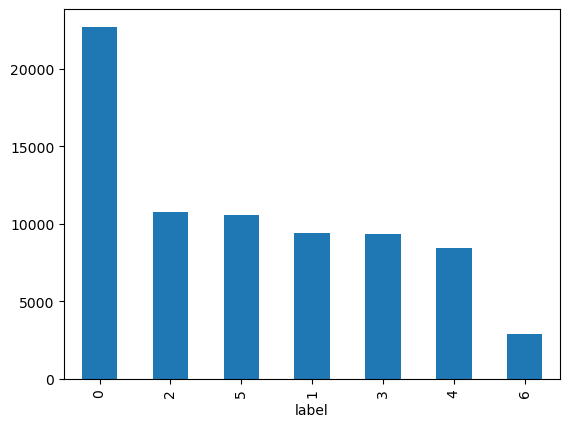

In [ ]:
y_train_val.value_counts().plot.bar

In [2]:
print(grid_search.best_score_)
X_eval, y_eval = clean_data(df_eval)

y_eval = grid_search.best_estimator_.predict(X_eval)

submission = pd.DataFrame({
    'Id' : range(len(y_eval)),
  'Predicted': y_eval
  })
submission.to_csv('submission.csv', index=False)


0.703957310670662


In [8]:
feature_names = grid_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

In [38]:
coefs = grid_search.best_estimator_.named_steps['model'].estimators_[1].coef_[5]

In [40]:
import pandas as pd
top_features = pd.DataFrame({'feature': feature_names, 'coefficient': coefs})

# 4. Ordiniamo per vedere le parole con il peso positivo più alto per la classe 5
print("Top 20 parole che 'spingono' verso la classe 5:")
print(top_features.sort_values(by='coefficient', ascending=False).head(20))

# 5. Ordiniamo per vedere cosa 'allontana' dalla classe 5 (pesi negativi)
print("\nTop 20 parole che 'escludono' la classe 5:")
print(top_features.sort_values(by='coefficient', ascending=True).head(20))

Top 20 parole che 'spingono' verso la classe 5:
                                feature  coefficient
27617                 tfidf__topstories     2.051317
7935         tfidf__com time topstories     2.051317
27484            tfidf__time topstories     2.051317
5020             tfidf__baghdad reuters     1.566034
30009                  source__source_\     1.400540
2641                         tfidf__adv     1.272086
14954               tfidf__iraq reuters     1.164411
30478           source__source_guardian     1.006355
7916         tfidf__com reuters topnews     0.981681
23359            tfidf__reuters topnews     0.981681
27607                    tfidf__topnews     0.963807
23263          tfidf__reuters president     0.863962
23265   tfidf__reuters president george     0.857723
14978                tfidf__iraqbaghdad     0.850059
23989               tfidf__said baghdad     0.822860
12236  tfidf__friday washington reuters     0.773805
27998         tfidf__tuesday washington     0.77272

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

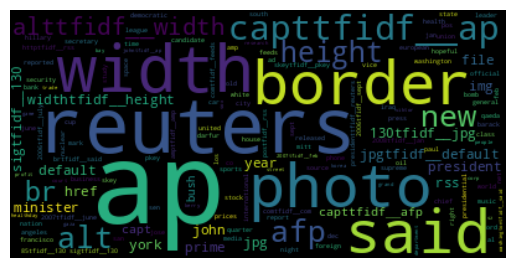

In [51]:
from wordcloud import WordCloud
words = ''
for _,row in top_features.iterrows():
  words = words + row['feature']
wordcloud = WordCloud().generate(words)
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")